In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from keras import layers
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import pandas as pd
from keras.layers import LSTM, Dense
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [3]:
df_fight_with_stats_precomp = pd.read_csv('fight_with_stats_precomp.csv')
df_fighter_total_stats = pd.read_csv('fighter_total_stats.csv')

In [4]:
df_fight_with_stats_precomp.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13784 entries, 0 to 13783
Data columns (total 63 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   EVENT                        13784 non-null  object 
 1   BOUT                         13784 non-null  object 
 2   FIGHTER                      13784 non-null  object 
 3   OPPONENT                     13784 non-null  object 
 4   METHOD                       13784 non-null  object 
 5   Win                          13784 non-null  int64  
 6   Women_fight                  13784 non-null  int64  
 7   ROUND                        13784 non-null  int64  
 8   HEIGHT_diff                  13691 non-null  float64
 9   REACH_diff                   11579 non-null  float64
 10  AGE_diff                     13363 non-null  float64
 11  form_skore_fighter           13784 non-null  float64
 12  form_skore_opponent          13784 non-null  float64
 13  fightNo_fighter 

In [5]:
df = df_fight_with_stats_precomp

In [6]:
df = df[(df['fightNo_fighter']>=1) & (df['fightNo_opponent']>=1) & (df['Women_fight']==0)]

In [7]:
df=df.drop(['Women_fight', 'HEIGHT_diff', 'REACH_diff', 'AGE_diff', 'HEAD_landed_fighter', 
                                     'HEAD_attemps_fighter', 'BODY_landed_fighter', 'BODY_attemps_fighter', 'LEG_landed_fighter', 'LEG_attemps_fighter',
                                     'HEAD_landed_opponent', 'HEAD_attemps_opponent', 'BODY_landed_opponent','BODY_attemps_opponent', 'LEG_landed_opponent', 
                                     'LEG_attemps_opponent', 'SIG.STR._attemps_fighter', 'TOTAL STR._attemps_fighter', 'TD_attemps_fighter', 'DISTANCE_attemps_fighter',
                                     'CLINCH_attemps_fighter', 'GROUND_attemps_fighter','SIG.STR._attemps_opponent', 'TOTAL STR._attemps_opponent','TD_attemps_opponent', 'DISTANCE_attemps_opponent', 'CLINCH_attemps_opponent', 'GROUND_attemps_opponent' ], axis=1)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12521 entries, 0 to 13783
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EVENT                       12521 non-null  object 
 1   BOUT                        12521 non-null  object 
 2   FIGHTER                     12521 non-null  object 
 3   OPPONENT                    12521 non-null  object 
 4   METHOD                      12521 non-null  object 
 5   Win                         12521 non-null  int64  
 6   ROUND                       12521 non-null  int64  
 7   form_skore_fighter          12521 non-null  float64
 8   form_skore_opponent         12521 non-null  float64
 9   fightNo_fighter             12521 non-null  int64  
 10  fightNo_opponent            12521 non-null  float64
 11  Win_tot                     10427 non-null  float64
 12  DRAW                        10427 non-null  float64
 13  No_contest                  104

In [9]:
df.columns.tolist()[15:]

['KD_fighter',
 'SUB.ATT_fighter',
 'REV._fighter',
 'CTRL_fighter',
 'SIG.STR._landed_fighter',
 'TOTAL STR._landed_fighter',
 'TD_landed_fighter',
 'DISTANCE_landed_fighter',
 'CLINCH_landed_fighter',
 'GROUND_landed_fighter',
 'KD_opponent',
 'SUB.ATT_opponent',
 'REV._opponent',
 'CTRL_opponent',
 'SIG.STR._landed_opponent',
 'TOTAL STR._landed_opponent',
 'TD_landed_opponent',
 'DISTANCE_landed_opponent',
 'CLINCH_landed_opponent',
 'GROUND_landed_opponent']

In [10]:
df = df.merge(df[['EVENT', 'BOUT', 'FIGHTER']+df.columns.tolist()[18:34]] ,how='left', left_on=['EVENT', 'BOUT', 'OPPONENT'], right_on=['EVENT', 'BOUT', 'FIGHTER'], suffixes=('_f1', '_f2'))

In [11]:
df = df.fillna(0)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12525 entries, 0 to 12524
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   EVENT                          12525 non-null  object 
 1   BOUT                           12525 non-null  object 
 2   FIGHTER_f1                     12525 non-null  object 
 3   OPPONENT                       12525 non-null  object 
 4   METHOD                         12525 non-null  object 
 5   Win                            12525 non-null  int64  
 6   ROUND                          12525 non-null  int64  
 7   form_skore_fighter             12525 non-null  float64
 8   form_skore_opponent            12525 non-null  float64
 9   fightNo_fighter                12525 non-null  int64  
 10  fightNo_opponent               12525 non-null  float64
 11  Win_tot                        12525 non-null  float64
 12  DRAW                           12525 non-null 

In [14]:
df_model=df.drop(['EVENT', 'BOUT', 'FIGHTER_f1', 'FIGHTER_f2', 'OPPONENT', 'METHOD'], axis=1)

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6817 entries, 0 to 6816
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Win                            6817 non-null   int64  
 1   ROUND                          6817 non-null   int64  
 2   form_skore_fighter             6817 non-null   float64
 3   form_skore_opponent            6817 non-null   float64
 4   fightNo_fighter                6817 non-null   int64  
 5   fightNo_opponent               6817 non-null   float64
 6   Win_tot                        6817 non-null   float64
 7   DRAW                           6817 non-null   float64
 8   No_contest                     6817 non-null   float64
 9   TotalTime                      6817 non-null   float64
 10  KD_fighter                     6817 non-null   float64
 11  SUB.ATT_fighter                6817 non-null   float64
 12  REV._fighter                   6817 non-null   f

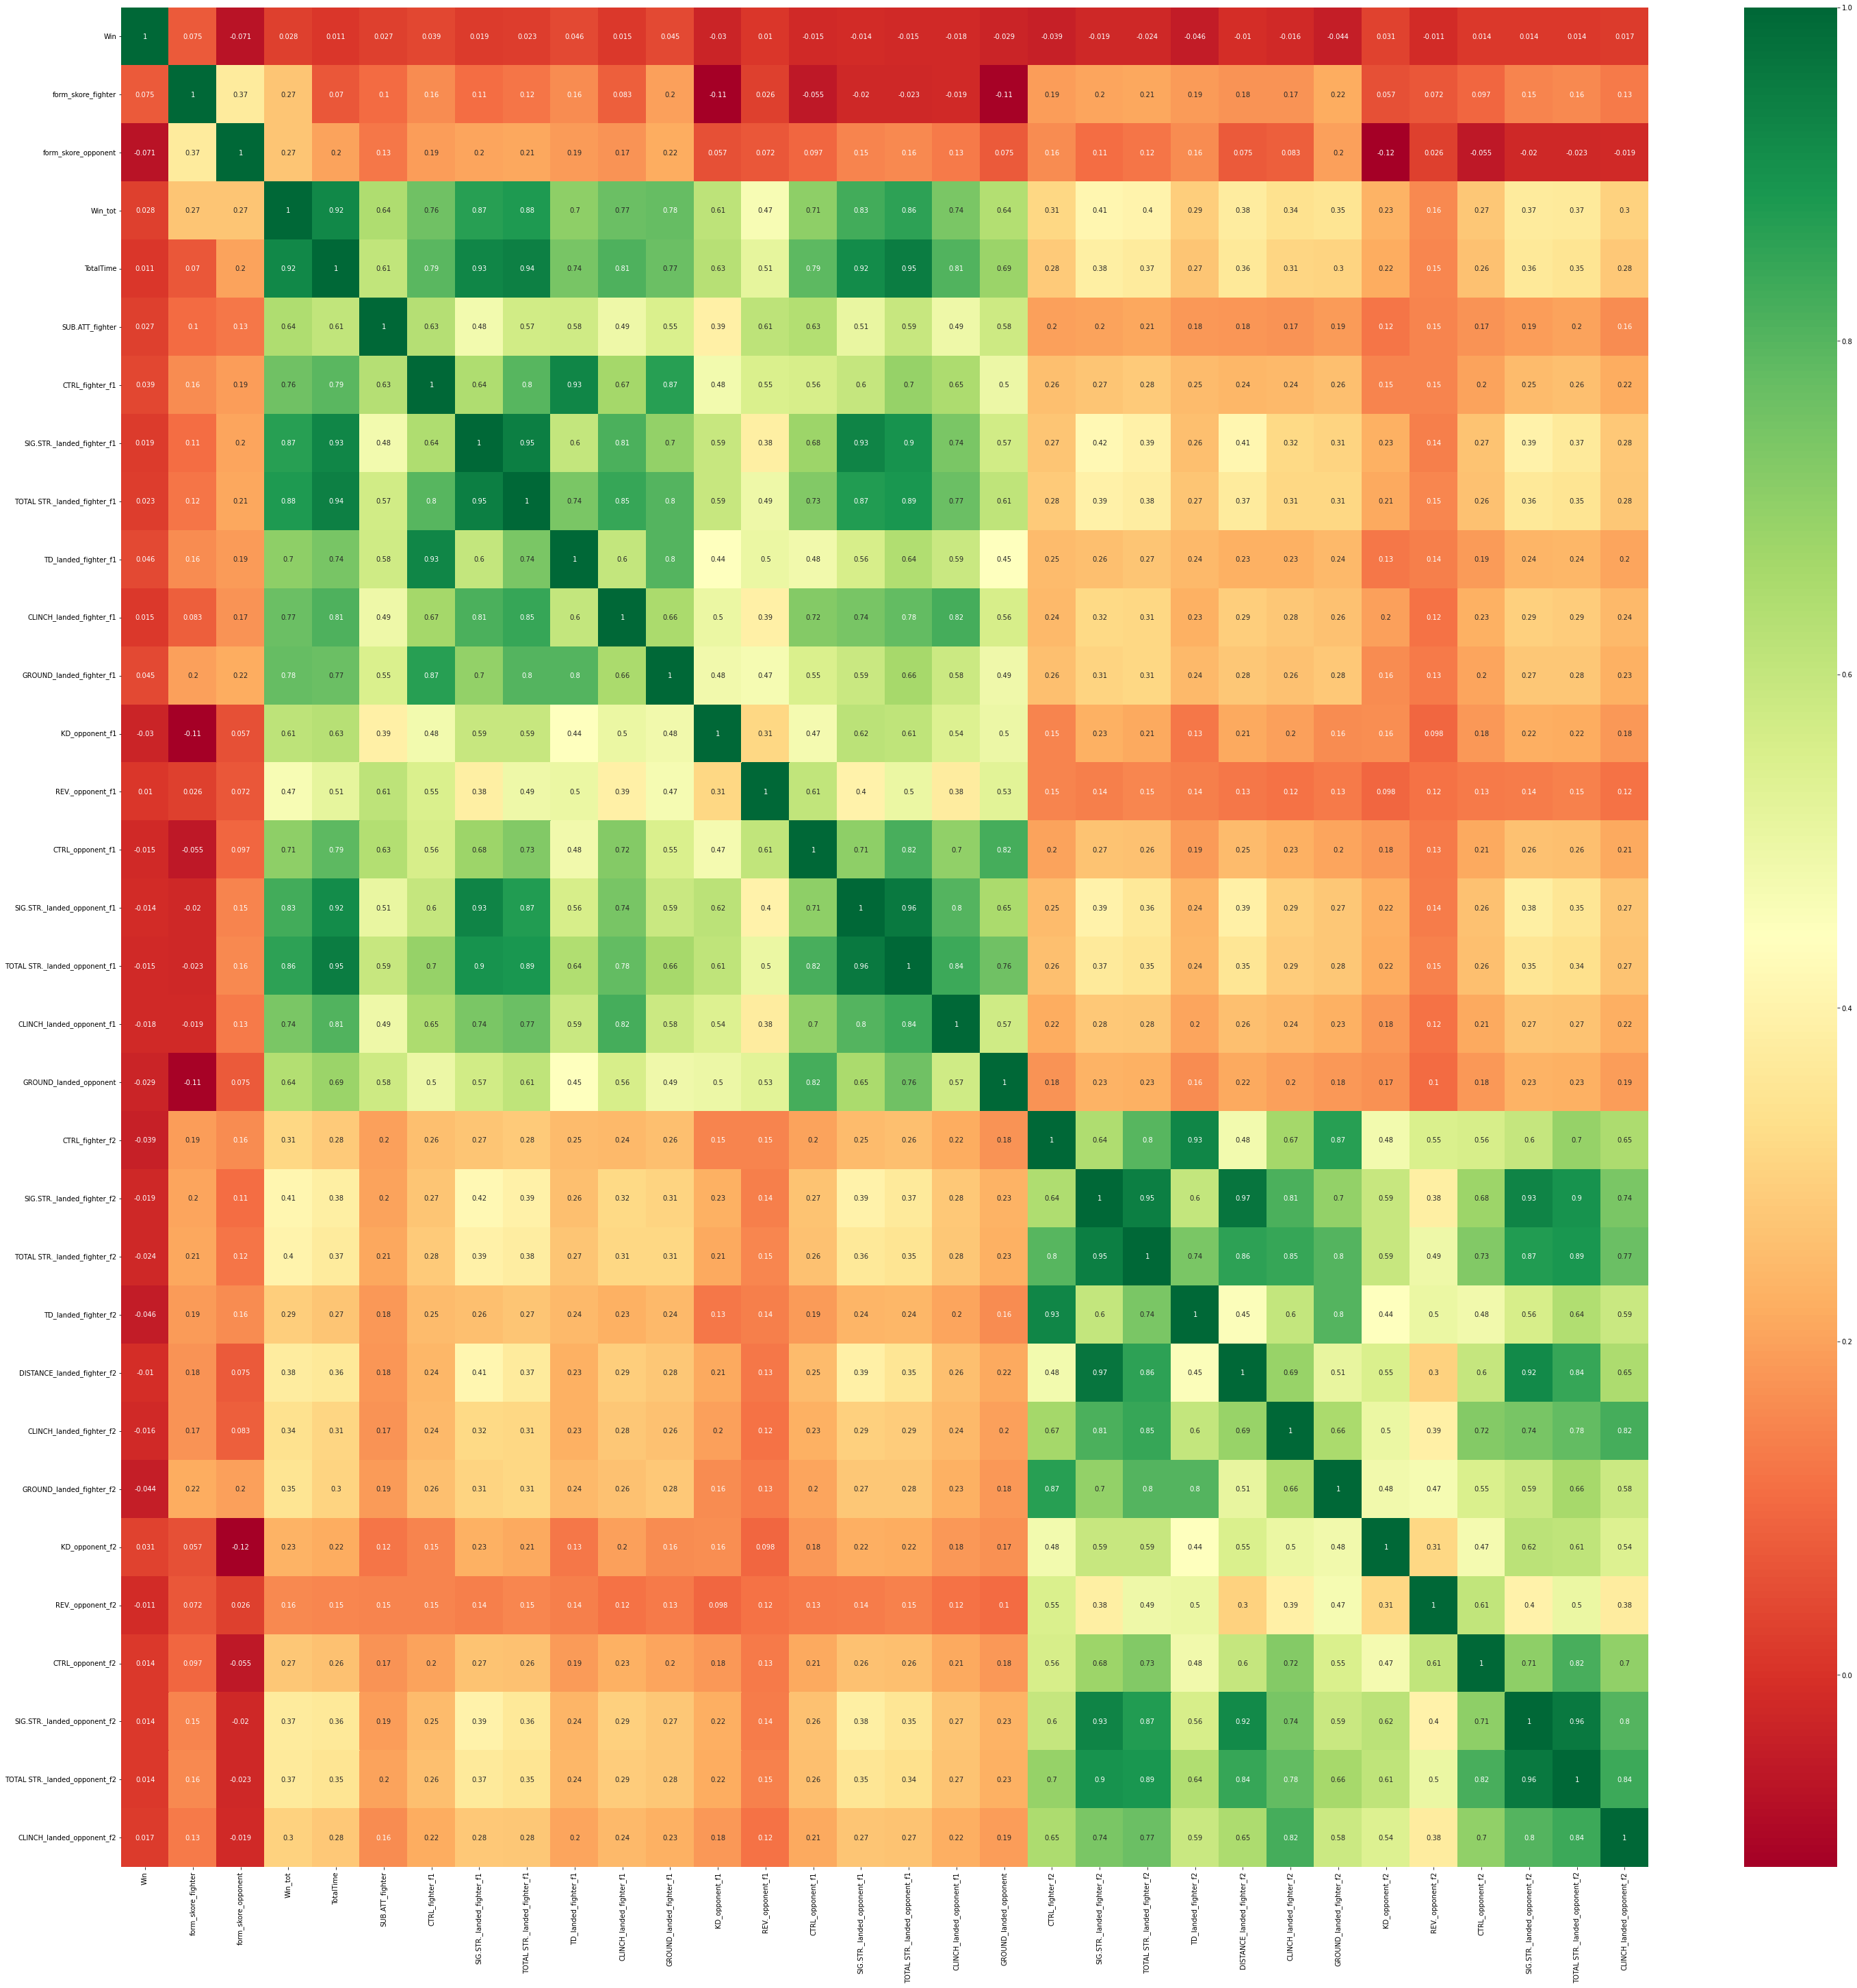

In [17]:
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat['Win'])>0.01]

plt.figure(figsize=(50,50))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [18]:
import pandas as pd
from keras.layers import LSTM, Dense
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# načtení dat

# definice lookback
lookback = 200

# převod dat na numpy array
data = df_model.values
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# rozdělení dat na trénovací a testovací
X = []
y = []
for i in range(lookback, len(data)):
    X.append(data_scaled[i-lookback:i, 1:])
    y.append(data_scaled[i, 0])
X = np.array(X)
y = np.array(y)
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# vytvoření modelu
model = Sequential()
model.add(LSTM(units=100, input_shape=(lookback, data.shape[1]-1)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

# natrénování modelu na trénovacích datech
model.fit(X_train, y_train, epochs=100, batch_size=32,validation_data=(X_test, y_test))

# hodnocení modelu na testovacích datech
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


(12325, 200, 45)
Epoch 1/100
309/309 [==============================] - 30s 90ms/step - loss: 0.6945 - accuracy: 0.5118 - val_loss: 0.6927 - val_accuracy: 0.5014
Epoch 2/100
309/309 [==============================] - 28s 89ms/step - loss: 0.6932 - accuracy: 0.5126 - val_loss: 0.6928 - val_accuracy: 0.5067
Epoch 3/100
309/309 [==============================] - 29s 94ms/step - loss: 0.6920 - accuracy: 0.5190 - val_loss: 0.6923 - val_accuracy: 0.5063
Epoch 4/100
309/309 [==============================] - 28s 91ms/step - loss: 0.6916 - accuracy: 0.5247 - val_loss: 0.6919 - val_accuracy: 0.5148
Epoch 5/100
309/309 [==============================] - 28s 90ms/step - loss: 0.6899 - accuracy: 0.5315 - val_loss: 0.6932 - val_accuracy: 0.5063
Epoch 6/100
309/309 [==============================] - 28s 91ms/step - loss: 0.6901 - accuracy: 0.5293 - val_loss: 0.6920 - val_accuracy: 0.5152
Epoch 7/100
309/309 [==============================] - 28s 92ms/step - loss: 0.6890 - accuracy: 0.5373 - val_loss

78/78 [==============================] - 4s 45ms/step


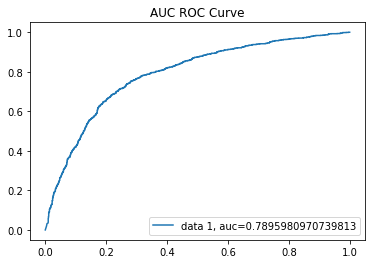

In [19]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_pred_proba =model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("AUC ROC Curve")
plt.show()

In [20]:
from sklearn.metrics import classification_report
auc = roc_auc_score(y_test, y_pred_proba) 
y_pred_binary = (y_pred_proba > 0.5).astype(int)
print(classification_report(y_test, y_pred_binary))
print('AUC-ROC score: ', auc)

              precision    recall  f1-score   support

         0.0       0.73      0.76      0.74      1244
         1.0       0.74      0.71      0.73      1221

    accuracy                           0.73      2465
   macro avg       0.73      0.73      0.73      2465
weighted avg       0.73      0.73      0.73      2465

AUC-ROC score:  0.7895980970739813
